In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Load the flights dataset
flights = pd.read_csv('flights.csv').dropna()
flights

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,time_hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,2013,1,1,533.0,529,1,4.0,850.0,830,20.0,...,1/1/13 5:00,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0
4,2013,1,1,554.0,600,0,-6.0,812.0,837,-25.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
7,2013,1,1,557.0,600,0,-3.0,709.0,723,-14.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
9,2013,1,1,558.0,600,0,-2.0,753.0,745,8.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
14,2013,1,1,559.0,600,0,-1.0,941.0,910,31.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332572,2013,9,26,1141.0,1145,0,-4.0,1457.0,1456,1.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332575,2013,9,26,1151.0,1150,1,1.0,1429.0,1415,14.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332577,2013,9,26,1151.0,1159,0,-8.0,1346.0,1344,2.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332586,2013,9,26,1158.0,1125,1,33.0,1339.0,1310,29.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0


In [2]:
# Define dataframes for each origin airport
EWR = flights[flights['origin'] == 'EWR']
JFK = flights[flights['origin'] == 'JFK']
LGA = flights[flights['origin'] == 'LGA']

In [3]:
all_counts = flights['delay'].value_counts()
all_counts

delay
0    39564
1    33170
Name: count, dtype: int64

Text(0, 0.5, 'Count')

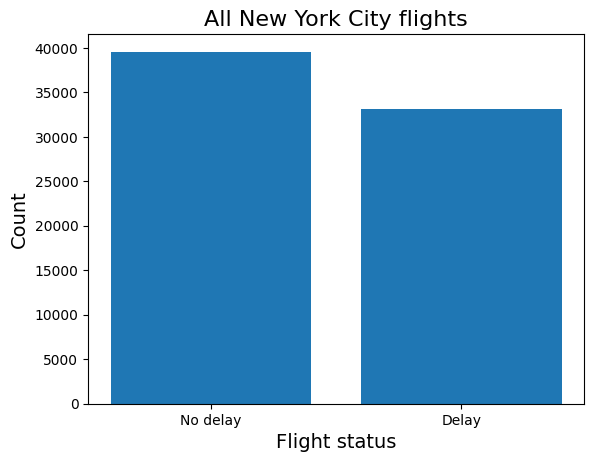

In [4]:
# Plot whether flights from all NY airports were delayed or not
plt.bar(x=['No delay', 'Delay'], height=all_counts)
plt.title('All New York City flights', fontsize=16)
plt.xlabel('Flight status', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [5]:
JFK_counts = JFK['delay'].value_counts()
JFK_counts

delay
0    10756
1     8456
Name: count, dtype: int64

Text(0, 0.5, 'Count')

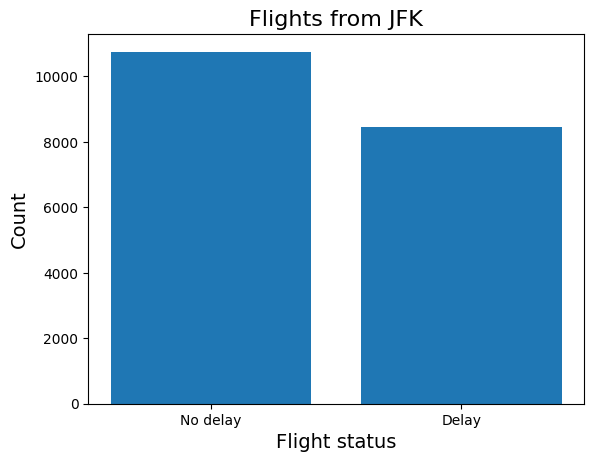

In [6]:
# Plot whether flights from JFK were delayed or not
plt.bar(x=['No delay', 'Delay'], height=JFK_counts)
plt.title('Flights from JFK', fontsize=16)
plt.xlabel('Flight status', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [7]:
LGA_counts = LGA['delay'].value_counts()
LGA_counts

delay
0    15385
1     9793
Name: count, dtype: int64

Text(0, 0.5, 'Count')

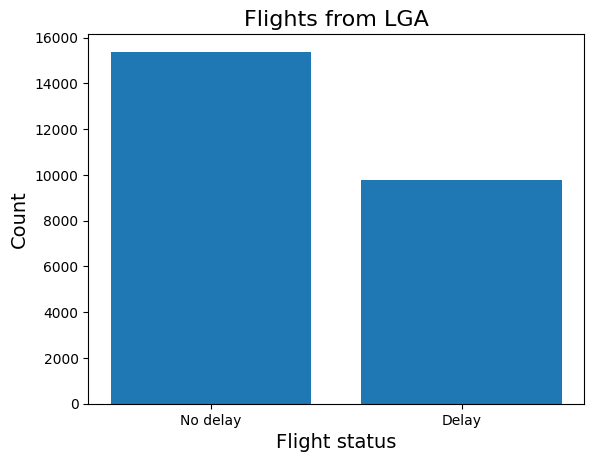

In [8]:
# Plot whether flights from LGA were delayed or not
plt.bar(x=['No delay', 'Delay'], height=LGA_counts)
plt.title('Flights from LGA', fontsize=16)
plt.xlabel('Flight status', fontsize=14)
plt.ylabel('Count', fontsize=14)

Suppose the two closest airports are JFK and LGA. Which airport is best for avoiding delays?

In [9]:
sample_prop = (JFK_counts[1] + LGA_counts[1]) / (len(JFK) + len(LGA))
sample_prop

np.float64(0.4111061049785988)

In [10]:
proportions_ztest(
    count=[JFK_counts[1], LGA_counts[1]],
    nobs=[len(JFK), len(LGA)],
    value=0,
    alternative='two-sided',
    prop_var=sample_prop,
)

(np.float64(10.8605461665445), np.float64(1.7768330129745866e-27))